# Classification Algorithms or Classifiers

Classifiers are supervised machine learning methods.  
Hence, they are trained on labelled data.  
During the test, they have to predict the class label of each test data point.

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [48]:
## Set global parameters for plots
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

In [50]:
## Classifiers to be used
names = [
    "Nearest Neighbors", ## k-nearest neighbours (kNN) classifier
    "Linear SVM", ## Linear support vector classifier (SVC)
    "RBF SVM", ## radial basis function (RBF) SVC
    "Gaussian Process", ## Gaussian process classifer (GPC)
    "Decision Tree", ## decision tree classifier
    "Random Forest", ## random forest classifer
    "MLP", ## multilayer perceptron (MLP) classifier
    "AdaBoost", ## AdaBoost classifier
    "G. Naive Bayes", ## naive Bayes classifier
    "QDA", ## quadratic discriminant analysis (QDA) classifier
]

In [52]:
## Initialise the classifiers
classifiers = [

    ## Initilise a kNN classifier.
    ## Consider the three nearest neighbours of each node for 
    ## running the algorithm.  
    KNeighborsClassifier(n_neighbors=3),

    ## Initilise an SVC with:
    ## a linear kernel martix,
    ## a regularizetion parameter valued 0.025, and
    ## a seed value of 42 for the pseduo random number generation.
    ## Once the seed value is fixed, the same sequence of pseudo random
    ## numbers will be generated. It will help us to reproduce
    ## the same result in every run.
    SVC(kernel="linear", C=0.025, random_state=42),

    ## Initilise an SVC with:
    ## a radial basis function (RBF) kernel martix (default) 
    ## having the 'gamma' kernel coefficient of 2,
    ## a regularizetion parameter valued 1, and
    ## a seed value of 42 for the pseduo random number generation.    
    SVC(gamma=2, C=1, random_state=42),

    ## Initialise a Gaussian process classifier (GPC) with
    ## a RBF kernel matrix and 
    ## a seed value of 42 for the pseduo random number generation.
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),

    ## Initialise a decision tree classifier with
    ## the maximum depth of 5. The depth of a tree is
    ## the number of edges from the root node to the 
    ## farthest leaf node.
    ## Again, a seed value of 42 is used for the pseduo random number generation.
    DecisionTreeClassifier(max_depth=5, random_state=42),

    ## Initialise a random forest classifier with
    ## 10 decision tree sub-classifiers.
    ## Each tree should have the maximum depth of 5.
    ## Decide each split based on a maximum of one feature, e.g., whether 'feature 1' > 4.0 or not.
    ## Do not consider the combined values of multiple features, e.g., whether ('feature 1' > 4.0 and 'feature 2' < 6.0) or not.
    ## Also, set a seed value of 42 for the pseudo random number generation.
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),

    ## Initialise an MLP classifer with 
    ## the 'alpha' L2 regularization term of 1.
    ## The L2 regularization term is a penalty added to the loss function to 
    ## make the MLP model less sensitive to noisy training inputs.
    ## In practice, the training data is expected to have some noise.
    ## If regularization is not done,
    ## the model would strictly fit itself to the training inputs
    ## irrespective of whether the training inputs are noisy or noiseless.
    ## As a result, during testing, the model might misclassify a noiseless test input.
    ## Let us consider an analogy.
    ## A person who has been drinking water-added milk most of his/her life 
    ## might believe that is the taste of pure milk.
    ## As a result, when served with pure milk, the person might not think it is pure milk.
    ## Such scenarios are called 'overfitting' to training inputs.
    ## To prevent overfitting, regularization is performed.
    ## For example, someone may inform the person that some of the milk he/she has been drinking
    ## might be adulterated with water. This knowledge will help the person be 
    ## concious that some of the input milks are sweeter and might be purer.
    ##
    ## Either train the MLP for 1000 epochs or its convergence, which one is earlier. 
    ## Set a seed value of 42 for the pseudo random number generation.
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),

    ## Initialise an 'adaptive boost' (AdaBoost) classifier with
    ## a seed value of 42 for the pseudo random number generation.
    ## Similar to the random forest classifier, 
    ## the AdaBoost classifier is an 'ensemble learning' classifier that employs
    ## an ensemble or group of sub-classifiers a.k.a 'weak learners'. 
    ## It gathers the decisions taken by individual weak learners and
    ## selects the class label decided by the majority of the weak learners.
    ## 
    ## However, unlike the random forest classifier,
    ## AdaBoost does not always treat each training sample with equal importance.
    ## It assigns a weight to each training sample.
    ## The weight of a training sample represents the importance of that sample in the current phase of training.  
    ## In the beginning, all training samples are assigned the same weight.
    ## Subsequently, a weak learner (by default, a decision tree) is trained on the training samples.
    ## For the training samples which have been misclassified by the weak learner, sample weights are incresed.
    ## On the other hand, the weights of the correctly classified training samples are decreased.
    ## Then the next weak learner is trained on all the training samples.
    ## Due to unequal sample weights, this weak learner focuses more on the training samples that
    ## have been misclassified by the previous weak learner.
    ## This way, every n-th weak learner focuses more on the training samples that
    ## have been misclassified by the (n-1)-th weak learner.
    ## Thus, AdaBoost trains an ensemble of weak learners who complement each other.
    AdaBoostClassifier(random_state=42),

    ## Initialise a Gaussian naive Bayes classifier.
    ## It is a 'Bayesian network' classifier where the 
    ## classifier model is a DAG.
    ## There are three nodes -- one represents the class label,
    ## the other two represent the features.
    ## There are only two edges: from the class label to the two features.
    ## It implies that the features are independent of each other given the class label.
    ## This implication is a 'naive' assumption and might not be realistic.
    ## Additionally, it is assumed that the values of each feature come from a Gaussian distribution.
    GaussianNB(),

    ## Initialise a quadratic discriminant analysis (QDA) classifier.
    ## It separates the input classes with a curve defined by a quadratic equation.
    QuadraticDiscriminantAnalysis(),
]

In [102]:
## Generate a synthetic/simulated/in-silico dataset.
## The dataset should have two features and both of them should be informative i.e. non-redundant.
## Set a seed value of 1 for the pseudo-random number generation.
## The dataset should have 2 classes (default).
## Each class should have only one cluster;
## in other words, each class should not have sub-groups or subclasses. 
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)

In [96]:
print(X.shape)
print(X[0:4, :])
print(len(y))
print(y)

(100, 2)
[[-1.04948638  0.8786438 ]
 [ 0.8780991   0.89551051]
 [ 0.95928819  1.03967316]
 [-1.18013412  1.12062155]]
100
[1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1
 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1]


In [98]:
## Add random noise to the in-silico dataset
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

In [100]:
print(X[0:4, :])
print(y)

[[-0.17749658  0.93049627]
 [ 1.97742406  1.76615529]
 [ 1.80002379  1.7003428 ]
 [-0.77083686  2.35916348]]
[1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1
 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1]


In [58]:
print(X.shape)
print(X[0:4,:])

(100, 2)
[[-0.17749658  0.93049627]
 [ 1.97742406  1.76615529]
 [ 1.80002379  1.7003428 ]
 [-0.77083686  2.35916348]]


(100, 2)
(100, 2)


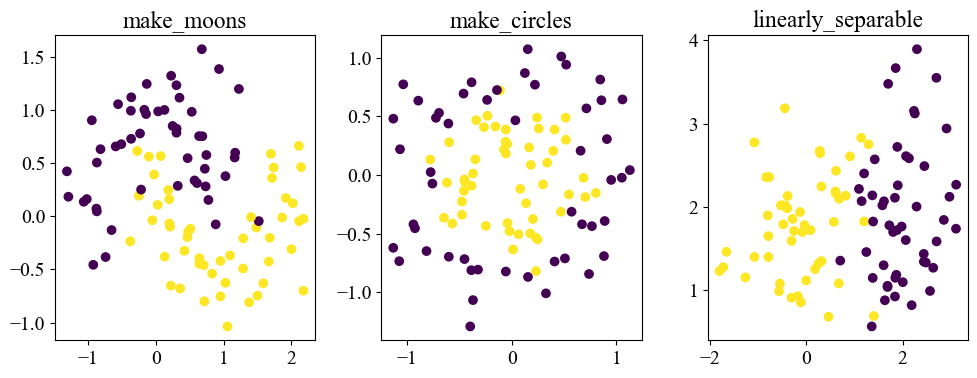

In [86]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

## Make a toy dataset with 100 samples and 2 classes.
## The toy dataset should look like two interleaving half circles in a scatter plot. 
X2, y2 = make_moons(noise=0.3, random_state=0)
print(X2.shape)
nonlin_moons = (X2, y2)
ax1.scatter(X2[:, 0], X2[:, 1], c=y2)
ax1.set_title("make_moons")

## Make another toy dataset with 100 samples and 2 classes.
## The toy dataset should look like two concentric circles in a scatter plot.
X3, y3 = make_circles(noise=0.2, factor=0.5, random_state=1)
print(X3.shape)
nonlin_circles = (X3, y3)
ax2.scatter(X3[:, 0], X3[:, 1], c=y3)
ax2.set_title("make_circles")

ax3.scatter(X[:, 0], X[:, 1], c=y)
ax3.set_title("linearly_separable")

plt.tight_layout()
plt.show()

In [80]:
datasets = [
    nonlin_moons,
    nonlin_circles,
    linearly_separable,
]

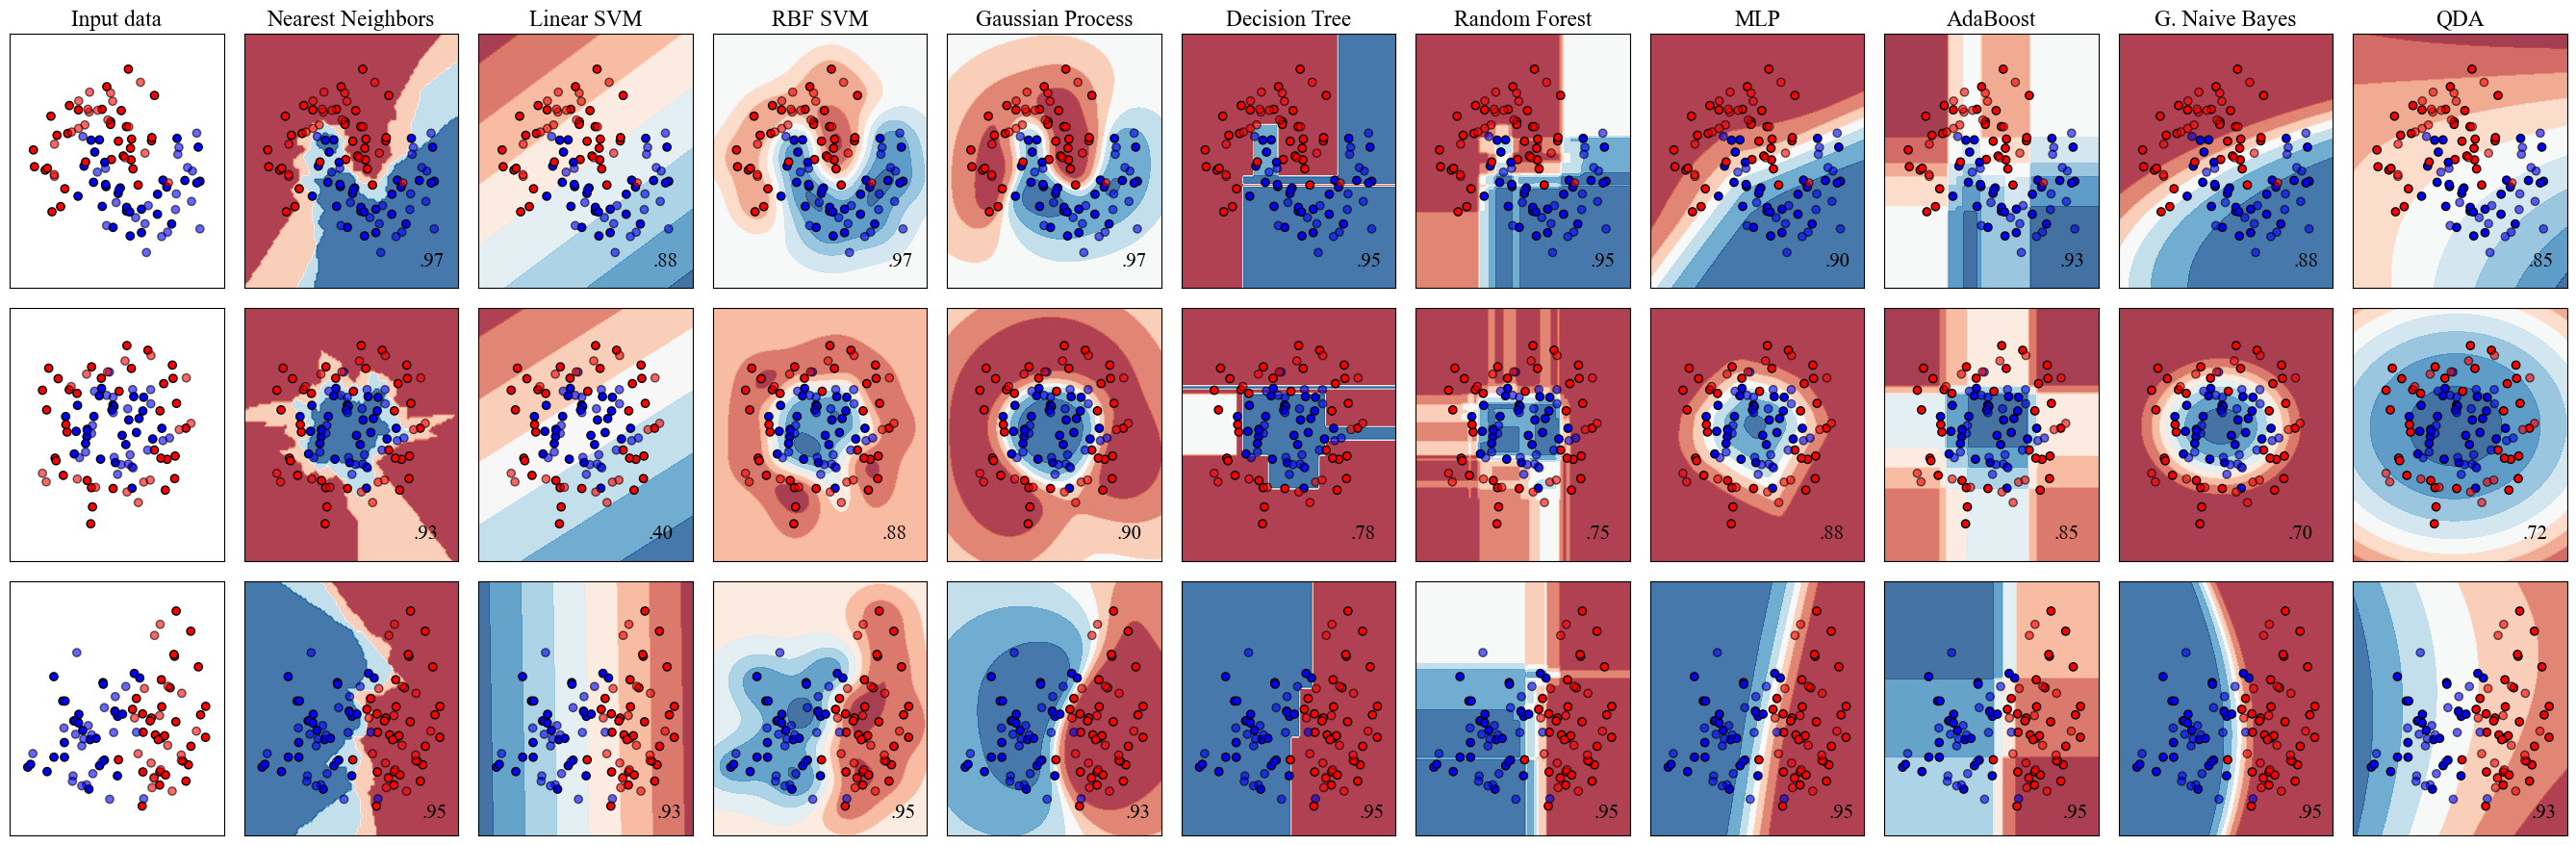

In [88]:
figure = plt.figure(figsize=(27, 9))
i = 1
## Iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds

    ## Randomly select 40% of the samples i.e. 40 samples to create the test set.
    ## Use the remaining 60 samples to create the training set. 
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    ## Plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training samples
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the test samples
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    ## Simulatenously iterate over the classifier names and the classifiers.
    ## The zip() function takes one or more iterables as input and
    ## simulatenously iterates over them.
    for name, clf in zip(names, classifiers):
        ## Create the subplots grid
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        ## Make a pipeline with two steps.
        ## In the first step, apply the 'StandardScaler()' function on the current dataset.
        ## This function transforms the dataset in such a way that the mean and standard deviation of 
        ## every feature/column becomes zero and one, respectively. That way the features become comparable.
        ##
        ## In the second step, train the current classifier on the transformed dataset.
        ##
        ## Ref: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline
        clf = make_pipeline(StandardScaler(), clf)

        ## Apply the pipeline i.e. transform the current dataset and 
        ## train the current classifier on the dataset.
        clf.fit(X_train, y_train)

        ## Test the trained classifier and
        ## calculate its 'accuracy' (default) score.
        ## Ref: https://stackoverflow.com/a/61497022
        score = clf.score(X_test, y_test)

        ## Visualize decision boundaries
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training samples
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the test samples
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

The plots show training samples in solid colours and test samples in semi-transparent colours.  
The value on the lower right corner shows the classification accuracy on the test set.

**References:**  
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py